[Errno 21] Is a directory: './dataset_cat_and_blue_jellyfish/train/blue_jellyfish'
[Errno 21] Is a directory: './dataset_cat_and_blue_jellyfish/train/cats'
cannot identify image file './dataset_cat_and_blue_jellyfish/train/.DS_Store'
[Errno 21] Is a directory: './dataset_cat_and_blue_jellyfish/test/blue_jellyfish'
[Errno 21] Is a directory: './dataset_cat_and_blue_jellyfish/test/cats'
cannot identify image file './dataset_cat_and_blue_jellyfish/test/.DS_Store'
Accuracy: 75.76%


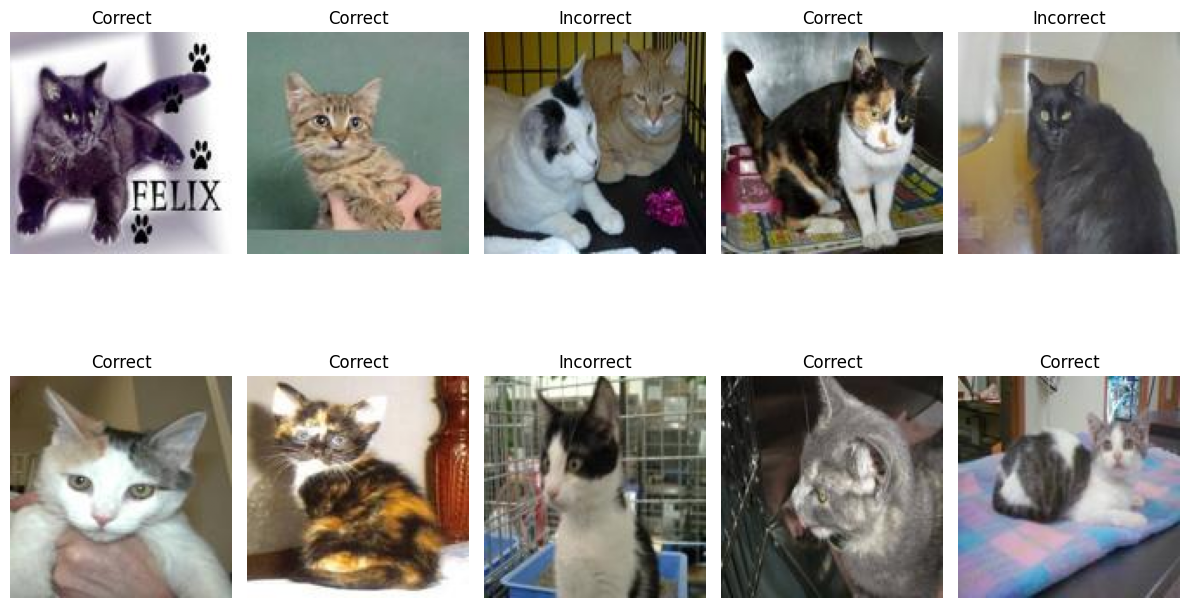

In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Define functions to resize and preprocess the images
def resize_images(src_paths, dst_paths):
    for src_path, dst_path in zip(src_paths, dst_paths):
        for filename in os.listdir(src_path):
            try:
                img = Image.open(os.path.join(src_path, filename))
                new_img = img.resize((128, 128))
                
                if not os.path.exists(dst_path):
                    os.makedirs(dst_path)
                
                new_img.save(os.path.join(dst_path, filename))
                print(f'Resize is successful and saved: {filename}')
                
            except Exception as e:
                print(e)
                continue

def load_and_preprocess_data(data_paths):
    images = []
    labels = []

    for data_path in data_paths:
        for filename in os.listdir(data_path):
            try:
                img = Image.open(os.path.join(data_path, filename))
                img = img.resize((128, 128))
                img = np.asarray(img) / 255.0
                images.append(img)
                labels.append(0 if "cat" in filename else 1)
            except Exception as e:
                print(e)
                continue

    return np.array(images), np.array(labels)

# Define paths
src_paths = ['./dataset_cat_and_blue_jellyfish/train/', './dataset_cat_and_blue_jellyfish/test/']
dst_paths = ['./dataset_cat_and_blue_jellyfish/train_resize/', './dataset_cat_and_blue_jellyfish/test_resize/']

# Resize the images
resize_images(src_paths, dst_paths)

# Load and preprocess the data
train_set_x, train_set_y = load_and_preprocess_data(['./dataset_cat_and_blue_jellyfish/train_resize/cats/', './dataset_cat_and_blue_jellyfish/train_resize/blue_jellyfish/'])
test_set_x, test_set_y = load_and_preprocess_data(['./dataset_cat_and_blue_jellyfish/test_resize/cats/', './dataset_cat_and_blue_jellyfish/test_resize/blue_jellyfish/'])

# Flatten the images
train_set_x = train_set_x.reshape(train_set_x.shape[0], -1)
test_set_x = test_set_x.reshape(test_set_x.shape[0], -1)

# Create and train a logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(train_set_x, train_set_y)

# Predict using the trained model
y_pred = logistic_regression_model.predict(test_set_x)

# Calculate accuracy
accuracy = accuracy_score(test_set_y, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

plt.figure(figsize=(12, 8))
for i in range(10):  # Plot the first 10 images for demonstration
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_set_x[i].reshape(128, 128, 3))  # Reshape to the original image shape
    title = "Correct" if test_set_y[i] == y_pred[i] else "Incorrect"
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


2023-11-05 08:54:18.371677: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 08:54:22.411551: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to

[Errno 21] Is a directory: './dataset_cat_and_blue_jellyfish/train/blue_jellyfish'
[Errno 21] Is a directory: './dataset_cat_and_blue_jellyfish/train/cats'
cannot identify image file './dataset_cat_and_blue_jellyfish/train/.DS_Store'
[Errno 21] Is a directory: './dataset_cat_and_blue_jellyfish/test/blue_jellyfish'
[Errno 21] Is a directory: './dataset_cat_and_blue_jellyfish/test/cats'
cannot identify image file './dataset_cat_and_blue_jellyfish/test/.DS_Store'
Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6838 - accuracy: 0.4706 - val_loss: 0.6248 - val_accuracy: 0.6000
Epoch 2/30
1/1 [==============================] - 0s 347ms/step - loss: 0.5031 - accuracy: 0.8824 - val_loss: 1.4300 - val_accuracy: 0.6000
Epoch 3/30
1/1 [==============================] - 0s 332ms/step - loss: 1.0210 - accuracy: 0.6471 - val_loss: 0.5264 - val_accuracy: 0.6000
Epoch 4/30
1/1 [==============================] - 0s 331ms/step - loss: 0.3370 - accuracy: 0.8824 - val_loss: 0.6459 -

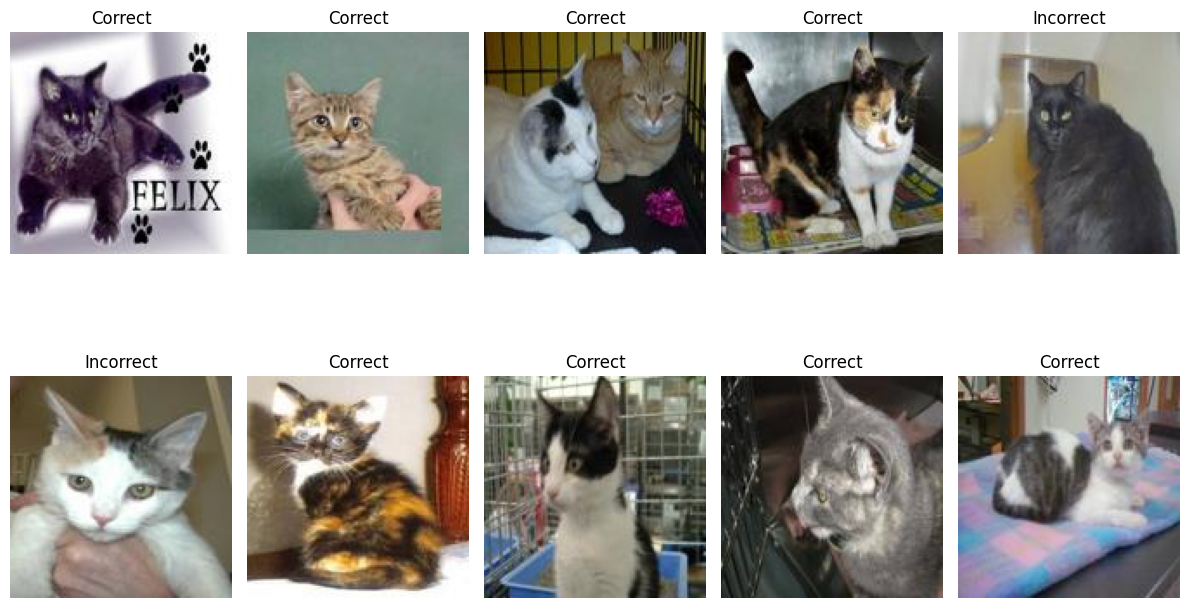

In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# Function to resize and preprocess images
def resize_images(src_paths, dst_paths):
    for src_path, dst_path in zip(src_paths, dst_paths):
        for filename in os.listdir(src_path):
            try:
                img = Image.open(os.path.join(src_path, filename))
                new_img = img.resize((128, 128))
                if not os.path.exists(dst_path):
                    os.makedirs(dst_path)
                new_img.save(os.path.join(dst_path, filename))
                print(f'Resize is successful and saved: {filename}')
            except Exception as e:
                print(e)
                continue

# Define paths
src_paths = ['./dataset_cat_and_blue_jellyfish/train/', './dataset_cat_and_blue_jellyfish/test/']
dst_paths = ['./dataset_cat_and_blue_jellyfish/train_resize/', './dataset_cat_and_blue_jellyfish/test_resize/']

# Resize the images
resize_images(src_paths, dst_paths)

# Load and preprocess the data
def load_and_preprocess_data(data_paths):
    images = []
    labels = []

    for data_path in data_paths:
        for filename in os.listdir(data_path):
            try:
                img = Image.open(os.path.join(data_path, filename))
                img = img.resize((128, 128))
                img = np.asarray(img) / 255.0
                images.append(img)
                labels.append(0 if "cat" in filename else 1)
            except Exception as e:
                print(e)
                continue

    return np.array(images), np.array(labels)

train_set_x, train_set_y = load_and_preprocess_data(['./dataset_cat_and_blue_jellyfish/train_resize/cats/', './dataset_cat_and_blue_jellyfish/train_resize/blue_jellyfish/'])
test_set_x, test_set_y = load_and_preprocess_data(['./dataset_cat_and_blue_jellyfish/test_resize/cats/', './dataset_cat_and_blue_jellyfish/test_resize/blue_jellyfish/'])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_set_x, train_set_y, test_size=0.2, random_state=42)

# Create a deep learning model using TensorFlow and Keras
model = keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(test_set_x)
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Calculate accuracy
accuracy = accuracy_score(test_set_y, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

plt.figure(figsize=(12, 8))
for i in range(10):  # Plot the first 10 images for demonstration
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_set_x[i].reshape(128, 128, 3))  # Reshape to the original image shape
    title = "Correct" if test_set_y[i] == y_pred[i] else "Incorrect"
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

